# Marco Teórico: Prophet con Regresores Técnicos

## 1. Introducción
El análisis de series temporales en finanzas busca modelar y predecir el comportamiento de precios de activos a lo largo del tiempo.  
Modelos estadísticos como ARIMA o GARCH han sido ampliamente utilizados; sin embargo, presentan limitaciones al enfrentarse a dinámicas no lineales, múltiples escalas temporales o a la necesidad de incorporar información exógena.  

En este contexto, **Prophet**, desarrollado por Facebook (Meta, 2017), se ha convertido en una herramienta flexible para pronósticos de series temporales. Su principal fortaleza radica en un enfoque **aditivo** y la posibilidad de incluir **regresores externos** que enriquecen el modelo.

---

## 2. Modelo base de Prophet
Prophet se fundamenta en un modelo aditivo de descomposición:

$$
y(t) = g(t) + s(t) + h(t) + \varepsilon_t
$$

Donde:  
- $g(t)$: tendencia a largo plazo (lineal o logística).  
- $s(t)$: estacionalidad representada mediante series de Fourier.  
- $h(t)$: efectos de eventos especiales (festivos, anuncios).  
- $\varepsilon_t$: error aleatorio no explicado.  

---

## 3. Incorporación de regresores externos
Prophet permite la inclusión de **regresores adicionales** $(x_i(t))$, con lo cual el modelo se extiende a:

$$
y(t) = g(t) + s(t) + h(t) + \sum_{i=1}^{k} \beta_i x_i(t) + \varepsilon_t
$$

Donde:  
- $x_i(t)$: regresor técnico o exógeno en el tiempo $t$.  
- $\beta_i$: coeficiente que mide el impacto marginal de cada regresor sobre el valor esperado de $y(t)$.  

Esta extensión convierte a Prophet en un **modelo semi-paramétrico**, que combina la flexibilidad del ajuste aditivo con la capacidad explicativa de los regresores.

---

## 4. Regresores técnicos en finanzas
Los **indicadores técnicos** son funciones matemáticas aplicadas a series de precios (y en ocasiones volumen), diseñadas para identificar tendencias, volatilidad o momentum en los mercados.  
Al integrarlos como regresores, el modelo Prophet no sólo aprende de la evolución histórica de precios, sino también de señales que resumen dinámicas complejas.

### 4.1 Medias Móviles Exponenciales (EMA)
Las EMAs ponderan más los precios recientes. Su fórmula es:

$$
EMA_t = \alpha P_t + (1-\alpha) EMA_{t-1}
$$

donde $\alpha = \frac{2}{n+1}$ y $n$ es la ventana de suavizado.  
Se usan ventanas de corto (EMA10), medio (EMA20, EMA50) y largo plazo (EMA100).  
Estas sirven como **regresores de tendencia y momentum**.

---

### 4.2 Índice de Fuerza Relativa (RSI)
Mide la magnitud de las ganancias frente a las pérdidas en un periodo $n$ (usualmente 14 días):

$$
RSI = 100 - \frac{100}{1 + RS}, \quad RS = \frac{\text{Promedio de ganancias}}{\text{Promedio de pérdidas}}
$$

El RSI detecta **sobrecompra y sobreventa**, y como regresor aporta información de **momentum**.

---

### 4.3 Media Móvil de Convergencia/Divergencia (MACD)
Calculado como la diferencia entre dos EMAs (rápida y lenta):

$$
MACD_t = EMA_{\text{fast}}(P_t) - EMA_{\text{slow}}(P_t)
$$

Se acompaña de una línea de señal (EMA del MACD) y un histograma.  
Como regresor, captura la **fuerza de tendencia** y los posibles cambios de dirección.

---

### 4.4 Rango Verdadero Promedio (ATR)
Es una medida de volatilidad:

$$
ATR_t = \text{EMA}_n(TR_t)
$$

donde el **True Range (TR)** considera:  
- $High_t - Low_t$  
- $|High_t - Close_{t-1}|$  
- $|Low_t - Close_{t-1}|$  

El ATR aporta información sobre la **amplitud de variaciones** de precios.

---

## 5. Ventajas del enfoque
- **Mayor capacidad predictiva**: los regresores técnicos permiten que Prophet capture dinámicas más allá de la tendencia y estacionalidad.  
- **Interpretación clara**: los coeficientes $\beta_i$ ofrecen una medida del impacto relativo de cada indicador.  
- **Flexibilidad**: se pueden incorporar regresores adicionales como volumen, indicadores macroeconómicos o señales derivadas de machine learning.  

---

## 6. Limitaciones
- Requiere un **cálculo robusto de los regresores futuros**: para horizontes largos se necesita simular o pronosticar los indicadores técnicos (ej. EMAs sobre valores proyectados).  
- El modelo sigue siendo **aditivo**, lo que puede limitar la captura de relaciones altamente no lineales.  
- La multicolinealidad entre indicadores técnicos (ej. EMA20 y EMA50) puede afectar la estabilidad de los coeficientes.  

---

## 7. Conclusión
El uso de **Prophet con regresores técnicos** representa una metodología híbrida que combina el poder explicativo de los indicadores financieros con la flexibilidad del modelo Prophet.  
De esta manera, se obtiene un marco predictivo más completo, capaz de integrar señales de tendencia, momentum y volatilidad, con aplicaciones directas en la construcción de estrategias de inversión y en la gestión de portafolios.

# PROPHET_Regresores Tecnicos

[*********************100%***********************]  1 of 1 completed
17:56:12 - cmdstanpy - INFO - Chain [1] start processing
17:56:13 - cmdstanpy - INFO - Chain [1] done processing
17:56:13 - cmdstanpy - INFO - Chain [1] start processing


============== EVALUACIÓN EN TEST (precio) ==============
TEST_LEN: 60 días | 2025-10-28 → 2026-01-23
MSE  : 1080.184678
RMSE : 32.866163


17:56:14 - cmdstanpy - INFO - Chain [1] done processing



============== PRONÓSTICO FUTURO (iterativo) ==============
Horizonte: 100 días

HEAD futuro:
          ds         yhat
0 2026-01-24  2095.154748
1 2026-01-25  2072.849398
2 2026-01-26  2096.341496
3 2026-01-27  2115.210663
4 2026-01-28  2125.942692

TAIL futuro:
           ds         yhat
95 2026-04-29  3163.044920
96 2026-04-30  3142.991748
97 2026-05-01  3122.604261
98 2026-05-02  3065.203007
99 2026-05-03  3019.960270


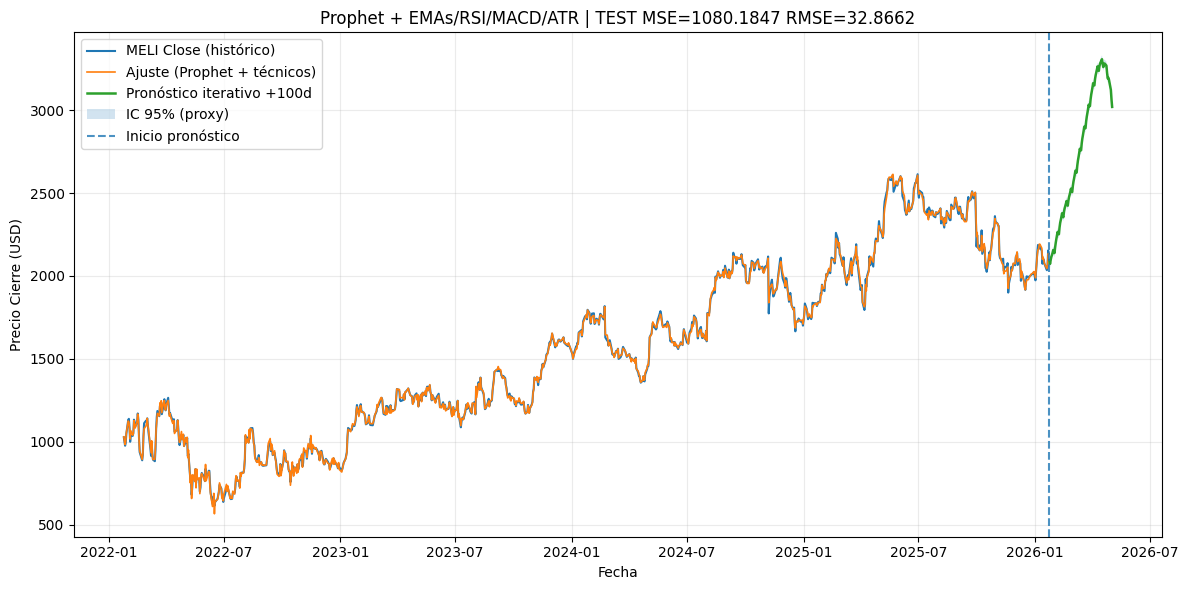

In [1]:
# ============================================================
# Prophet con regresores técnicos (EMA, RSI, MACD, ATR)
# - Evalúa MSE/RMSE en TEST
# - Pronóstico iterativo 100 días (recalcula EMAs/RSI/MACD con yhat)
# - ATR(14) se mantiene constante en el futuro (aprox.)
# ============================================================

# !pip install yfinance prophet matplotlib scikit-learn --quiet

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import yfinance as yf
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# -----------------------------
# Parámetros
# -----------------------------
TICKER       = "MELI"#"AAPL"
PERIOD       = "4y"
INTERVAL     = "1d"
TEST_LEN     = 60          # días de evaluación (holdout)
HORIZON_DAYS = 100         # horizonte futuro

# -----------------------------
# 1) Descargar datos
# -----------------------------
data = yf.download(TICKER, period=PERIOD, interval=INTERVAL, auto_adjust=True)
data.columns = data.columns.droplevel(1)

if data.empty:
    raise ValueError("No se descargaron datos. Verifica el ticker o parámetros.")

# Asegurar columnas
data = data[['Open', 'High', 'Low', 'Close']].dropna().copy()
data.reset_index(inplace=True)            # Date -> columna
data.rename(columns={'Date': 'ds'}, inplace=True)
data['ds'] = pd.to_datetime(data['ds'])

# -----------------------------
# 2) Funciones de indicadores
# -----------------------------
def ema(series, span):
    return series.ewm(span=span, adjust=False).mean()

def rsi(series, window=14):
    delta = series.diff()
    gain  = np.where(delta > 0, delta, 0.0)
    loss  = np.where(delta < 0, -delta, 0.0)
    # Explicitly flatten the arrays to ensure they are 1-dimensional
    gain_s = pd.Series(gain.flatten(), index=series.index).rolling(window).mean()
    loss_s = pd.Series(loss.flatten(), index=series.index).rolling(window).mean()
    rs = gain_s / (loss_s.replace(0, np.nan))
    rsi_val = 100 - (100 / (1 + rs))
    return rsi_val.fillna(method='bfill').fillna(50.0)


def macd(series, fast=12, slow=26, signal=9):
    ema_fast = ema(series, fast)
    ema_slow = ema(series, slow)
    macd_line = ema_fast - ema_slow
    signal_line = ema(macd_line, signal)
    hist = macd_line - signal_line
    return macd_line, signal_line, hist

def true_range(high, low, close):
    prev_close = close.shift(1)
    tr = pd.concat([
        (high - low),
        (high - prev_close).abs(),
        (low  - prev_close).abs()
    ], axis=1).max(axis=1)
    return tr

def atr(high, low, close, window=14, method="ema"):
    tr = true_range(high, low, close)
    if method == "ema":
        return tr.ewm(alpha=1/window, adjust=False).mean()
    else:
        return tr.rolling(window).mean()

# -----------------------------
# 3) Construir regresores técnicos
# -----------------------------
df = data.copy()
df['y'] = df['Close']

# EMAs
df['EMA_10']  = ema(df['Close'], 10)
df['EMA_20']  = ema(df['Close'], 20)
df['EMA_50']  = ema(df['Close'], 50)
df['EMA_100'] = ema(df['Close'], 100)

# RSI(14)
df['RSI_14'] = rsi(df['Close'], 14)

# MACD clásico 12-26-9
macd_line, macd_signal, macd_hist = macd(df['Close'], 12, 26, 9)
df['MACD']        = macd_line
df['MACD_signal'] = macd_signal
df['MACD_hist']   = macd_hist

# MACD "14" (fast=14, slow=28, signal=9) para respetar tu petición
macd14_line, macd14_signal, macd14_hist = macd(df['Close'], 14, 28, 9)
df['MACD_14']        = macd14_line
df['MACD_14_signal'] = macd14_signal
df['MACD_14_hist']   = macd14_hist

# ATR(14)
df['ATR_14'] = atr(df['High'], df['Low'], df['Close'], 14, method="ema")

# (Opcional) Retorno simple como señal adicional
df['SimpleRet'] = df['Close'].pct_change().fillna(0.0)

# Limpiar NaN iniciales por indicadores
feat_cols = [
    'EMA_10','EMA_20','EMA_50','EMA_100',
    'RSI_14',
    'MACD','MACD_signal','MACD_hist',
    'MACD_14','MACD_14_signal','MACD_14_hist',
    'ATR_14',
    'SimpleRet'
]
df = df.dropna(subset=feat_cols + ['y']).reset_index(drop=True)

# -----------------------------
# 4) Train/Test split
# -----------------------------
if len(df) <= TEST_LEN + 30:
    TEST_LEN = max(15, len(df)//5)

train = df.iloc[:-TEST_LEN].copy()
test  = df.iloc[-TEST_LEN:].copy()

# -----------------------------
# 5) Instanciar Prophet y agregar regresores
# -----------------------------
base_kwargs = dict(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    changepoint_prior_scale=0.5
)
m = Prophet(**base_kwargs)
for c in feat_cols:
    m.add_regressor(c)

# Entrenar
m.fit(train[['ds','y'] + feat_cols])

# -----------------------------
# 6) Predicción en TEST y métricas
# -----------------------------
fcst_eval = m.predict(test[['ds'] + feat_cols])
mse  = mean_squared_error(test['y'].values, fcst_eval['yhat'].values)
rmse = float(np.sqrt(mse))

print("============== EVALUACIÓN EN TEST (precio) ==============")
print(f"TEST_LEN: {TEST_LEN} días | {test['ds'].min().date()} → {test['ds'].max().date()}")
print(f"MSE  : {mse:.6f}")
print(f"RMSE : {rmse:.6f}")

# -----------------------------
# 7) Reentrenar con TODO para pronosticar
# -----------------------------
m_full = Prophet(**base_kwargs)
for c in feat_cols:
    m_full.add_regressor(c)
m_full.fit(df[['ds','y'] + feat_cols])

# -----------------------------
# 8) Pronóstico iterativo a 100 días
#    - Recalcula EMAs/RSI/MACD con los yhat generados
#    - Mantiene ATR_14 como constante (último valor observado)
# -----------------------------
last_date = df['ds'].max()
atr_last  = df['ATR_14'].iloc[-1]

# Copia de trabajo con SOLO lo necesario para recalcular señales desde 'Close'
work = df[['ds','y','Open','High','Low','Close']].copy()
work.rename(columns={'y':'Close_target'}, inplace=True)  # Close_target = señal para EMAs/RSI/MACD

# Helper: recomputa features sobre 'work' (Close_target)
def recompute_features(wdf):
    out = pd.DataFrame(index=wdf.index)
    s = wdf['Close_target']
    out['EMA_10']  = ema(s,10)
    out['EMA_20']  = ema(s,20)
    out['EMA_50']  = ema(s,50)
    out['EMA_100'] = ema(s,100)
    out['RSI_14']  = rsi(s,14)
    mac, mac_sig, mac_h = macd(s,12,26,9)
    out['MACD']        = mac
    out['MACD_signal'] = mac_sig
    out['MACD_hist']   = mac_h
    mac14, mac14_sig, mac14_h = macd(s,14,28,9)
    out['MACD_14']        = mac14
    out['MACD_14_signal'] = mac14_sig
    out['MACD_14_hist']   = mac14_h
    out['SimpleRet'] = s.pct_change().fillna(0.0)
    return out

# Últimas features históricas alineadas
features_hist = recompute_features(work)

future_rows = []
future_preds = []

current_date = last_date
for step in range(1, HORIZON_DAYS+1):
    next_date = current_date + pd.Timedelta(days=1)
    # Construir fila de entrada: usar las features recomputadas de la ÚLTIMA fila disponible
    feats_last = recompute_features(work).iloc[-1].copy()
    row = {'ds': next_date}
    for c in feat_cols:
        if c == 'ATR_14':
            row[c] = atr_last  # mantener ATR(14) constante en el futuro
        else:
            row[c] = float(feats_last[c])
    # Predecir yhat para ese día
    one_df = pd.DataFrame([row])
    yhat_next = float(m_full.predict(one_df)[['yhat']].iloc[0,0])
    # Guardar predicción
    future_preds.append({'ds': next_date, 'yhat': yhat_next})
    # Actualizar 'work' agregando la nueva observación pronosticada
    add_row = {
        'ds': next_date,
        'Close_target': yhat_next,
        'Open': yhat_next, 'High': yhat_next, 'Low': yhat_next, 'Close': yhat_next
    }
    work = pd.concat([work, pd.DataFrame([add_row])], ignore_index=True)
    current_date = next_date

future_preds = pd.DataFrame(future_preds)

# -----------------------------
# 9) Salidas de pronóstico
# -----------------------------
print("\n============== PRONÓSTICO FUTURO (iterativo) ==============")
print(f"Horizonte: {HORIZON_DAYS} días")
print("\nHEAD futuro:")
print(future_preds.head(5))
print("\nTAIL futuro:")
print(future_preds.tail(5))

# Para bandas de confianza (aprox): usar incertidumbre histórica de residuos del ajuste completo
# (opcional y sencillo): desvío estándar de residuos en train completo como proxy
fc_full_in = m_full.predict(df[['ds'] + feat_cols])
resid = df['y'].values - fc_full_in['yhat'].values
sigma = np.std(resid)
future_preds['yhat_lower'] = future_preds['yhat'] - 1.96 * sigma
future_preds['yhat_upper'] = future_preds['yhat'] + 1.96 * sigma

# -----------------------------
# 10) Gráficos
# -----------------------------
plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'], label=f"{TICKER} Close (histórico)", linewidth=1.5)
plt.plot(fc_full_in['ds'], fc_full_in['yhat'], label="Ajuste (Prophet + técnicos)", linewidth=1.2)
plt.plot(future_preds['ds'], future_preds['yhat'], label=f"Pronóstico iterativo +{HORIZON_DAYS}d", linewidth=1.8)
plt.fill_between(future_preds['ds'].values,
                 future_preds['yhat_lower'].values,
                 future_preds['yhat_upper'].values,
                 alpha=0.2, label="IC 95% (proxy)")
plt.axvline(x=last_date, linestyle="--", alpha=0.8, label="Inicio pronóstico")
plt.title(f"Prophet + EMAs/RSI/MACD/ATR | TEST MSE={mse:.4f} RMSE={rmse:.4f}")
plt.xlabel("Fecha")
plt.ylabel("Precio Cierre (USD)")
plt.legend()
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

In [2]:
dos_porciento = round(future_preds['yhat'].iloc[-1] * 0.02, 3)
cinco_porciento = round(future_preds['yhat'].iloc[-1] * 0.05, 3)
rmse_ = round(rmse,3)
print(f"2%: ${dos_porciento}, 5%: ${cinco_porciento}, RMSE: ${rmse_}")
#<2% muy bueno
#2%-5% aceptable
#5% demasiado error, no es buen predictor

2%: $60.399, 5%: $150.998, RMSE: $32.866


# PROPHET_Regresores Técnicos_Volumen

[*********************100%***********************]  1 of 1 completed
17:56:18 - cmdstanpy - INFO - Chain [1] start processing
17:56:19 - cmdstanpy - INFO - Chain [1] done processing
17:56:19 - cmdstanpy - INFO - Chain [1] start processing


============== EVALUACIÓN EN TEST (precio) ==============
TEST_LEN: 60 días | 2025-10-28 → 2026-01-23
MSE  : 683.559162
RMSE : 26.144964


17:56:21 - cmdstanpy - INFO - Chain [1] done processing



============== PRONÓSTICO FUTURO (iterativo) ==============
Horizonte: 100 días

HEAD futuro:
          ds         yhat   yhat_lower   yhat_upper
0 2026-01-24  2093.223574  2069.604970  2116.842179
1 2026-01-25  2069.316687  2045.698083  2092.935291
2 2026-01-26  2096.270651  2072.652047  2119.889255
3 2026-01-27  2117.463293  2093.844688  2141.081897
4 2026-01-28  2129.644820  2106.026216  2153.263424

TAIL futuro:
           ds         yhat   yhat_lower   yhat_upper
95 2026-04-29  3087.931744  3064.313140  3111.550348
96 2026-04-30  3078.428582  3054.809978  3102.047186
97 2026-05-01  3068.779774  3045.161169  3092.398378
98 2026-05-02  3017.272361  2993.653757  3040.890966
99 2026-05-03  2979.415795  2955.797191  3003.034400


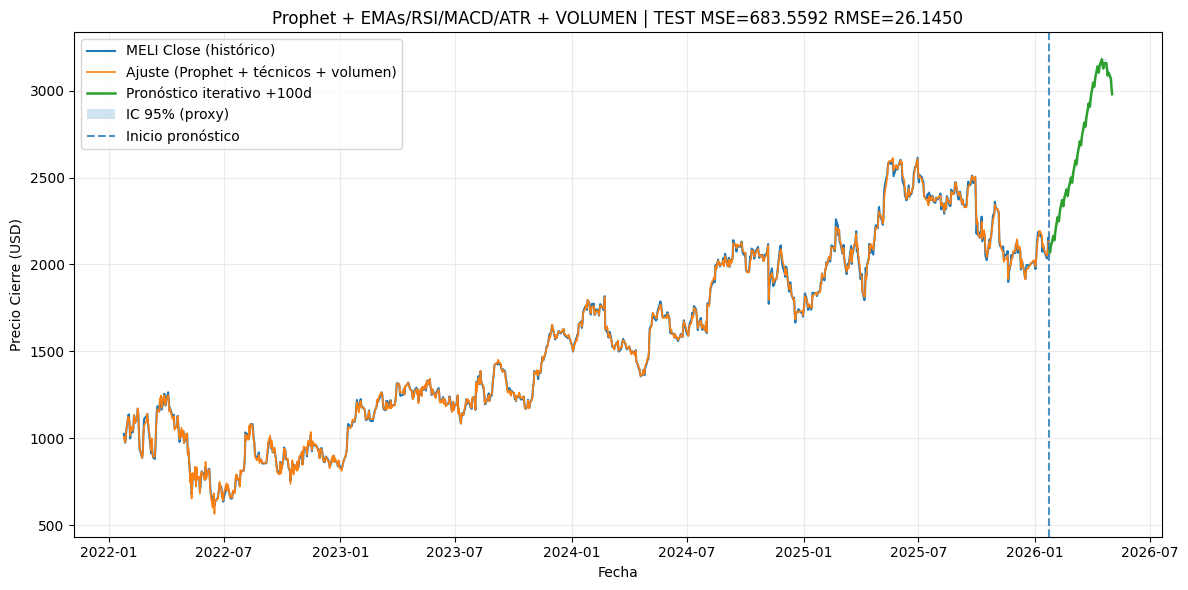

In [3]:
# ============================================================
# Prophet con regresores técnicos + Volumen
# - Evalúa MSE/RMSE en TEST
# - Pronóstico iterativo 100 días
#   * Recalcula EMAs/RSI/MACD con yhat
#   * ATR(14) y Volumen se mantienen constantes (aprox)
# ============================================================

# !pip install yfinance prophet matplotlib scikit-learn --quiet

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import yfinance as yf
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# -----------------------------
# Parámetros
# -----------------------------
TICKER       = TICKER #"AMZN"
PERIOD       = PERIOD #"4y"
INTERVAL     = INTERVAL #"1d"
TEST_LEN     = TEST_LEN #60           # días de evaluación (holdout)
HORIZON_DAYS = HORIZON_DAYS #100          # horizonte futuro

# -----------------------------
# 1) Descargar datos
# -----------------------------
data = yf.download(TICKER, period=PERIOD, interval=INTERVAL, auto_adjust=True)

# yfinance puede devolver columnas MultiIndex (por Dividend/Stock Splits). Aplanar si aplica:
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.droplevel(1)

if data.empty:
    raise ValueError("No se descargaron datos. Verifica el ticker o parámetros.")

# Asegurar columnas
data = data[['Open', 'High', 'Low', 'Close', 'Volume']].dropna().copy()
data.reset_index(inplace=True)            # Date -> columna
data.rename(columns={'Date': 'ds'}, inplace=True)
data['ds'] = pd.to_datetime(data['ds'])

# -----------------------------
# 2) Funciones de indicadores
# -----------------------------
def ema(series, span):
    return series.ewm(span=span, adjust=False).mean()

def rsi(series, window=14):
    delta = series.diff()
    gain  = np.where(delta > 0, delta, 0.0)
    loss  = np.where(delta < 0, -delta, 0.0)
    # Asegurar 1D para Series (robustez)
    gain_s = pd.Series(np.asarray(gain).reshape(-1), index=series.index).rolling(window).mean()
    loss_s = pd.Series(np.asarray(loss).reshape(-1), index=series.index).rolling(window).mean()
    rs = gain_s / (loss_s.replace(0, np.nan))
    rsi_val = 100 - (100 / (1 + rs))
    return rsi_val.fillna(method='bfill').fillna(50.0)

def macd(series, fast=12, slow=26, signal=9):
    ema_fast = ema(series, fast)
    ema_slow = ema(series, slow)
    macd_line = ema_fast - ema_slow
    signal_line = ema(macd_line, signal)
    hist = macd_line - signal_line
    return macd_line, signal_line, hist

def true_range(high, low, close):
    prev_close = close.shift(1)
    tr = pd.concat([
        (high - low),
        (high - prev_close).abs(),
        (low  - prev_close).abs()
    ], axis=1).max(axis=1)
    return tr

def atr(high, low, close, window=14, method="ema"):
    tr = true_range(high, low, close)
    if method == "ema":
        return tr.ewm(alpha=1/window, adjust=False).mean()
    else:
        return tr.rolling(window).mean()

# -----------------------------
# 3) Construir regresores técnicos
# -----------------------------
df = data.copy()
df['y'] = df['Close']

# EMAs
df['EMA_10']  = ema(df['Close'], 10)
df['EMA_20']  = ema(df['Close'], 20)
df['EMA_50']  = ema(df['Close'], 50)
df['EMA_100'] = ema(df['Close'], 100)

# RSI(14)
df['RSI_14'] = rsi(df['Close'], 14)

# MACD clásico 12-26-9
macd_line, macd_signal, macd_hist = macd(df['Close'], 12, 26, 9)
df['MACD']        = macd_line
df['MACD_signal'] = macd_signal
df['MACD_hist']   = macd_hist

# MACD "14" (fast=14, slow=28, signal=9) por tu requerimiento
macd14_line, macd14_signal, macd14_hist = macd(df['Close'], 14, 28, 9)
df['MACD_14']        = macd14_line
df['MACD_14_signal'] = macd14_signal
df['MACD_14_hist']   = macd14_hist

# ATR(14)
df['ATR_14'] = atr(df['High'], df['Low'], df['Close'], 14, method="ema")

# Retorno simple como señal adicional
df['SimpleRet'] = df['Close'].pct_change().fillna(0.0)

# VOLUMEN y derivados 
df['Volume']     = df['Volume'].astype(float)
df['Vol_EMA_20'] = ema(df['Volume'], 20)
df['Vol_Log']    = np.log1p(df['Volume'])

# Lista de regresores
feat_cols = [
    'EMA_10','EMA_20','EMA_50','EMA_100',
    'RSI_14',
    'MACD','MACD_signal','MACD_hist',
    'MACD_14','MACD_14_signal','MACD_14_hist',
    'ATR_14',
    'SimpleRet',
    'Volume','Vol_EMA_20','Vol_Log'
]

# Limpiar NaN iniciales por indicadores
df = df.dropna(subset=feat_cols + ['y']).reset_index(drop=True)

# -----------------------------
# 4) Train/Test split
# -----------------------------
if len(df) <= TEST_LEN + 30:
    TEST_LEN = max(15, len(df)//5)

train = df.iloc[:-TEST_LEN].copy()
test  = df.iloc[-TEST_LEN:].copy()

# -----------------------------
# 5) Instanciar Prophet y agregar regresores
# -----------------------------
base_kwargs = dict(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    changepoint_prior_scale=0.5
)
m = Prophet(**base_kwargs)
for c in feat_cols:
    m.add_regressor(c)

# Entrenar
m.fit(train[['ds','y'] + feat_cols])

# -----------------------------
# 6) Predicción en TEST y métricas
# -----------------------------
fcst_eval = m.predict(test[['ds'] + feat_cols])
mse  = mean_squared_error(test['y'].values, fcst_eval['yhat'].values)
rmse = float(np.sqrt(mse))

print("============== EVALUACIÓN EN TEST (precio) ==============")
print(f"TEST_LEN: {TEST_LEN} días | {test['ds'].min().date()} → {test['ds'].max().date()}")
print(f"MSE  : {mse:.6f}")
print(f"RMSE : {rmse:.6f}")

# -----------------------------
# 7) Reentrenar con TODO para pronosticar
# -----------------------------
m_full = Prophet(**base_kwargs)
for c in feat_cols:
    m_full.add_regressor(c)
m_full.fit(df[['ds','y'] + feat_cols])

# -----------------------------
# 8) Pronóstico iterativo a 100 días
#    - Recalcula EMAs/RSI/MACD con los yhat generados
#    - Mantiene ATR_14 y Volumen constantes (aprox)
# -----------------------------
last_date = df['ds'].max()
atr_last  = float(df['ATR_14'].iloc[-1])
vol_last  = float(df['Volume'].iloc[-1])
vema_last = float(df['Vol_EMA_20'].iloc[-1])
vlog_last = float(df['Vol_Log'].iloc[-1])

# Copia de trabajo con SOLO lo necesario para recalcular señales desde 'Close'
work = df[['ds','y','Open','High','Low','Close']].copy()
work.rename(columns={'y':'Close_target'}, inplace=True)  # Close_target = señal para EMAs/RSI/MACD

def recompute_features(wdf):
    out = pd.DataFrame(index=wdf.index)
    s = wdf['Close_target']
    out['EMA_10']  = ema(s,10)
    out['EMA_20']  = ema(s,20)
    out['EMA_50']  = ema(s,50)
    out['EMA_100'] = ema(s,100)
    out['RSI_14']  = rsi(s,14)
    mac, mac_sig, mac_h = macd(s,12,26,9)
    out['MACD']        = mac
    out['MACD_signal'] = mac_sig
    out['MACD_hist']   = mac_h
    mac14, mac14_sig, mac14_h = macd(s,14,28,9)
    out['MACD_14']        = mac14
    out['MACD_14_signal'] = mac14_sig
    out['MACD_14_hist']   = mac14_h
    out['SimpleRet'] = s.pct_change().fillna(0.0)
    return out

future_preds = []
current_date = last_date

for step in range(1, HORIZON_DAYS+1):
    next_date = current_date + pd.Timedelta(days=1)

    # Recalcular features hasta el último punto disponible
    feats_last = recompute_features(work).iloc[-1].copy()

    # Construir fila futura con TODOS los regresores
    row = {'ds': next_date}
    for c in feat_cols:
        if c == 'ATR_14':
            row[c] = atr_last
        elif c == 'Volume':
            row[c] = vol_last
        elif c == 'Vol_EMA_20':
            row[c] = vema_last
        elif c == 'Vol_Log':
            row[c] = vlog_last
        else:
            row[c] = float(feats_last[c])

    one_df = pd.DataFrame([row])
    yhat_next = float(m_full.predict(one_df)[['yhat']].iloc[0,0])

    future_preds.append({'ds': next_date, 'yhat': yhat_next})

    # Actualizar work (usamos yhat como Close para recalcular indicadores)
    add_row = {
        'ds': next_date,
        'Close_target': yhat_next,
        'Open': yhat_next, 'High': yhat_next, 'Low': yhat_next, 'Close': yhat_next
    }
    work = pd.concat([work, pd.DataFrame([add_row])], ignore_index=True)
    current_date = next_date

future_preds = pd.DataFrame(future_preds)

# -----------------------------
# 9) Bandas (proxy) y salida
# -----------------------------
# Usamos la desviación de residuos del ajuste completo como proxy de incertidumbre
fc_full_in = m_full.predict(df[['ds'] + feat_cols])
resid = df['y'].values - fc_full_in['yhat'].values
sigma = np.std(resid)

future_preds['yhat_lower'] = future_preds['yhat'] - 1.96 * sigma
future_preds['yhat_upper'] = future_preds['yhat'] + 1.96 * sigma

print("\n============== PRONÓSTICO FUTURO (iterativo) ==============")
print(f"Horizonte: {HORIZON_DAYS} días")
print("\nHEAD futuro:")
print(future_preds.head(5))
print("\nTAIL futuro:")
print(future_preds.tail(5))

# -----------------------------
# 10) Gráficos
# -----------------------------
plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'], label=f"{TICKER} Close (histórico)", linewidth=1.5)
plt.plot(fc_full_in['ds'], fc_full_in['yhat'], label="Ajuste (Prophet + técnicos + volumen)", linewidth=1.2)
plt.plot(future_preds['ds'], future_preds['yhat'], label=f"Pronóstico iterativo +{HORIZON_DAYS}d", linewidth=1.8)
plt.fill_between(future_preds['ds'].values,
                 future_preds['yhat_lower'].values,
                 future_preds['yhat_upper'].values,
                 alpha=0.2, label="IC 95% (proxy)")
plt.axvline(x=df['ds'].max(), linestyle="--", alpha=0.8, label="Inicio pronóstico")
plt.title(f"Prophet + EMAs/RSI/MACD/ATR + VOLUMEN | TEST MSE={mse:.4f} RMSE={rmse:.4f}")
plt.xlabel("Fecha")
plt.ylabel("Precio Cierre (USD)")
plt.legend()
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

In [4]:
dos_porciento_conVolumen = round(future_preds['yhat'].iloc[-1] * 0.02, 3)
cinco_porciento_conVolumen = round(future_preds['yhat'].iloc[-1] * 0.05, 3)
rmse__conVolumen = round(rmse,3)
print(f"2%: ${dos_porciento_conVolumen}, 5%: ${cinco_porciento_conVolumen}, RMSE: ${rmse__conVolumen}")
#<2% muy bueno
#2%-5% aceptable
#5% demasiado error, no es buen predictor

2%: $59.588, 5%: $148.971, RMSE: $26.145


In [5]:
# Comparar con y sin Volumen

print(f"PROPHET sin VOLUMEN: 2%: ${dos_porciento}, 5%: ${cinco_porciento}, RMSE: ${rmse_}")
print(f"PROPHET CON VOLUMEN: 2%: ${dos_porciento_conVolumen}, 5%: ${cinco_porciento_conVolumen}, RMSE: ${rmse__conVolumen}")

# Tomar el que tiene el menor RMSE

PROPHET sin VOLUMEN: 2%: $60.399, 5%: $150.998, RMSE: $32.866
PROPHET CON VOLUMEN: 2%: $59.588, 5%: $148.971, RMSE: $26.145
